In [277]:
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import numpy as np
import uproot
import os
import glob
import awkward as ak
from scipy.stats import norm

In [278]:
data_path = "/home/haue/repositories/Masters/data/singleprotons/Al/inclbetacut/"
g_singlep_path = "/home/haue/repositories/Masters/data/gamma/Al/singlep_gammas"

#outputdir = "/figure_output/"
## Load in all files from the datapath with the suffix mlio.root
Al_files = glob.glob(os.path.join(data_path, "*mlio.root"))
g_singlep_files = glob.glob(os.path.join(g_singlep_path, "*mlio.root"))

#Files to be analyzed 
Analysis_files = g_singlep_files

upscale = 1/0.34
scale = 3.326542500626603 # difference in solid angle coverage of two proton events up to 4pi
sac6_div_total = 4.993289447838043 # ratio between total solid angle coverage and solid angle coverage of id3 to account for lack of detection of beta particles

In [279]:
Egs1_p = np.array([]);Egs2_p = np.array([])
Egs1_p_eff = np.array([]);Egs2_p_eff = np.array([])   
Egs1_p_efferr = np.array([]);Egs2_p_efferr = np.array([])        
for batch in uproot.iterate(Analysis_files, expressions=["Eg1", "eff1", "eff1_err"],
            cut=f"(pg1) & (Eg1>0) & (eff1>0)"):
    Egs1_p = np.append(Egs1_p, batch.Eg1)
    Egs1_p_eff = np.append(Egs1_p_eff, batch.eff1)
    Egs1_p_efferr = np.append(Egs1_p_efferr, batch.eff1_err)
print("Eg1 done")
for batch in uproot.iterate(Analysis_files, expressions=["Eg2", "eff2", "eff2_err"],
            cut=f"(pg2) & (Eg2>0) & (eff2>0)"):
    Egs2_p = np.append(Egs2_p, batch.Eg2)
    Egs2_p_eff = np.append(Egs2_p_eff, batch.eff2)
    Egs2_p_efferr = np.append(Egs2_p_efferr, batch.eff2_err)

Egs1_p = Egs1_p[~np.isnan(Egs1_p)]
Egs2_p = Egs2_p[~np.isnan(Egs2_p)]
Egs1_p_eff = Egs1_p_eff[~np.isnan(Egs1_p_eff)]
Egs2_p_eff = Egs2_p_eff[~np.isnan(Egs2_p_eff)]
Egs1_p_efferr = Egs1_p_efferr[~np.isnan(Egs1_p_efferr)]
Egs2_p_efferr = Egs2_p_efferr[~np.isnan(Egs2_p_efferr)]

Egs1_b = np.array([]);Egs2_b = np.array([])
Egs1_b_eff = np.array([]);Egs2_b_eff = np.array([])        
for batch in uproot.iterate(Analysis_files, expressions=["Eg1", "eff1"],
            cut=f"(bg1) & (Eg1>0) & (eff1>0)"):
    Egs1_b = np.append(Egs1_b, batch.Eg1)
    Egs1_b_eff = np.append(Egs1_b_eff, batch.eff1)
print("Eg1 done")
for batch in uproot.iterate(Analysis_files, expressions=["Eg2", "eff2"],
            cut=f"(bg2) & (Eg2>0) & (eff2>0)"):
    Egs2_b = np.append(Egs2_b, batch.Eg2)
    Egs2_b_eff = np.append(Egs2_b_eff, batch.eff2)

Egs1_b = Egs1_b[~np.isnan(Egs1_b)]
Egs2_b = Egs2_b[~np.isnan(Egs2_b)]
Egs1_b_eff = Egs1_b_eff[~np.isnan(Egs1_b_eff)]
Egs2_b_eff = Egs2_b_eff[~np.isnan(Egs2_b_eff)]

Eg1 done
Eg1 done


In [280]:
Egs1_b

<Array [] type='0 * float64'>

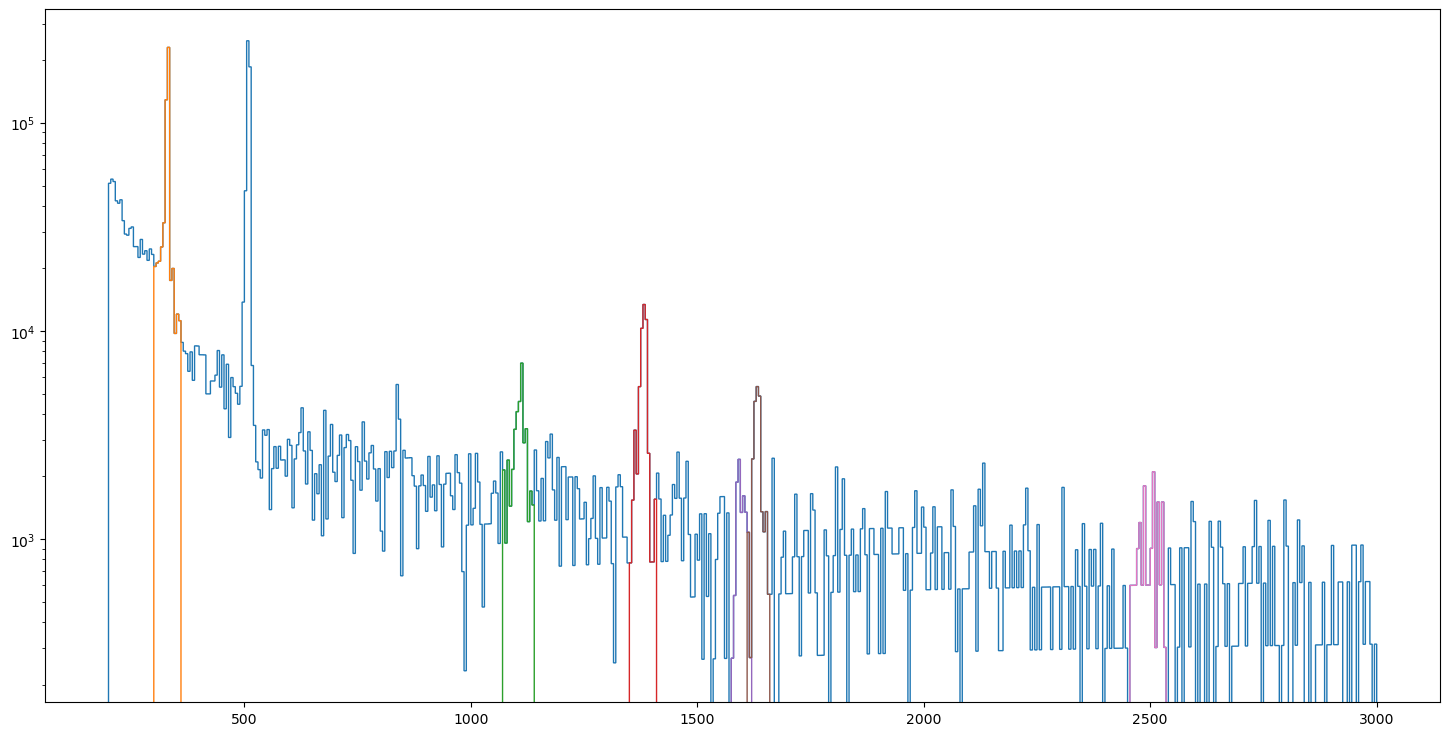

In [281]:
plt.figure(figsize=(18,9))
lowlims = [300,1070,1350,1570,1610,2450]
uplims = [360,1140,1410,1620,1660,2540]

plt.hist(Egs1_p, bins=np.arange(200,3000+5, 5),weights=1/np.array(Egs1_p_eff), histtype='step')
for l,u in zip(lowlims,uplims):
    mask = (Egs1_p < u) & (Egs1_p>l)
    plt.hist(Egs1_p[mask], bins=np.arange(200,3000+5,5), weights=1/np.array(Egs1_p_eff[mask]), histtype='step')
plt.yscale('log')

In [295]:
from scipy.special import erfc

def expgausslin(x, A, mu, sigma, lamb,s,c):
    x = np.asarray(x)
    arg1 = lamb / 2 * (2 * mu + lamb * sigma**2 - 2 * x)
    arg2 = (mu + lamb * sigma**2 - x) / (np.sqrt(2) * sigma)
    emg = A * (lamb / 2) * np.exp(arg1) * erfc(arg2)
    b = s*x+c
    return emg+b
def gausslin(x, a, x0, sigma, s, c):
    return a*np.exp(-(x-x0)**2/(2*sigma**2)) + s*x+c
def gauss(x, A, mu, sigma):
    return A * np.exp(-(x - mu) ** 2 / (2 * sigma ** 2))


Area under Gaussian: 1715808.22 ± 44000.40 counts
Fit parameters: 276618.6971380061 330.75513678673735 2.4745559491992672


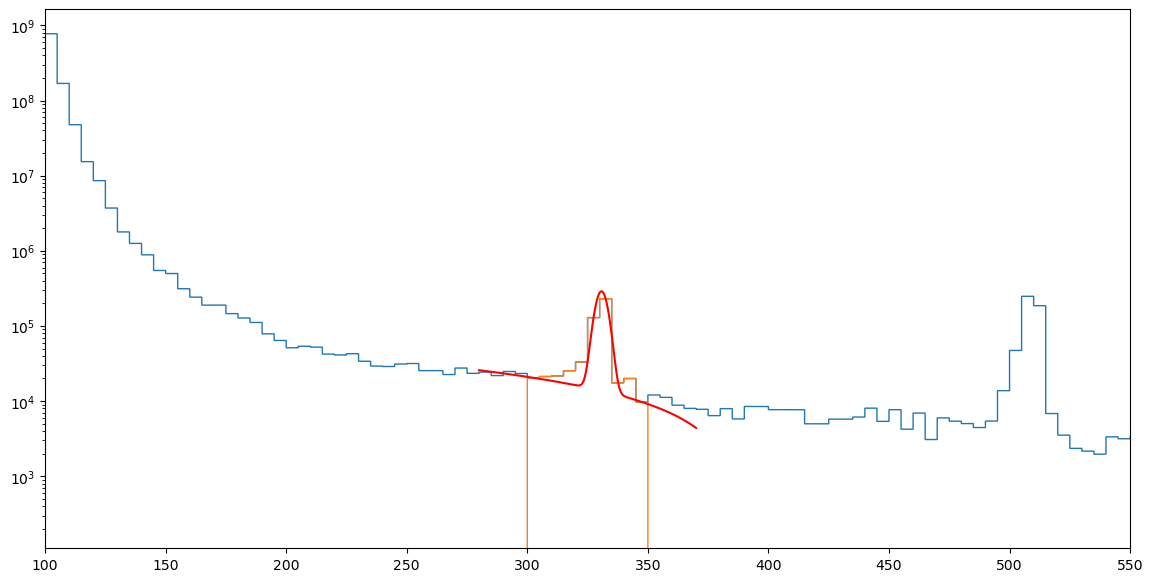

Area under Gaussian: 85851.81 ± 13488.44 counts
Fit parameters: 4019.3999103909687 1109.025328591195 8.521151753440396


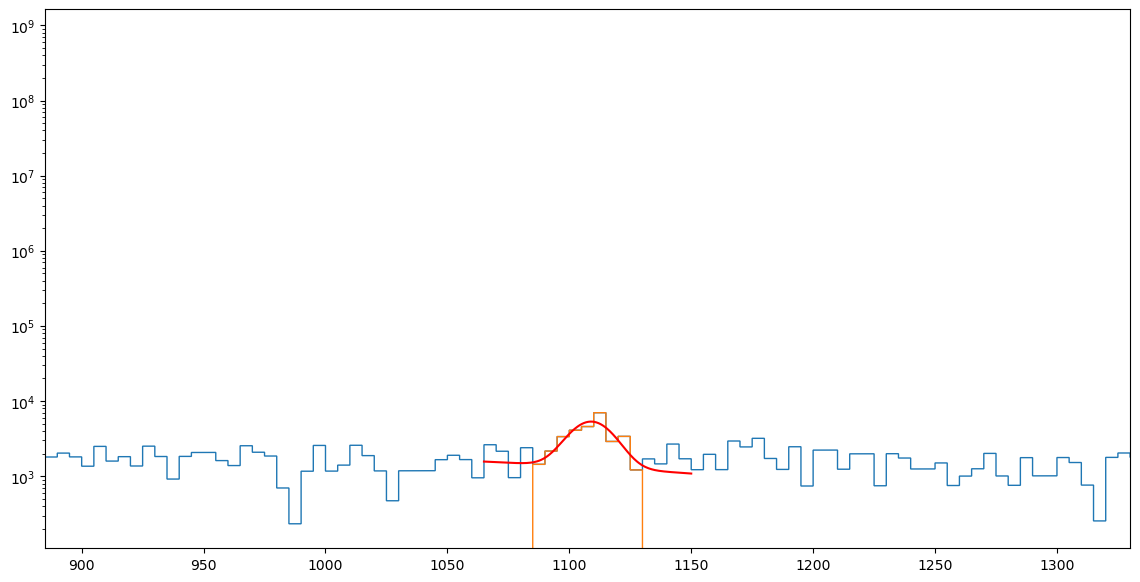

Area under Gaussian: 199224.02 ± 17114.65 counts
Fit parameters: 13167.784440840713 1381.4425868429096 6.035858605038273


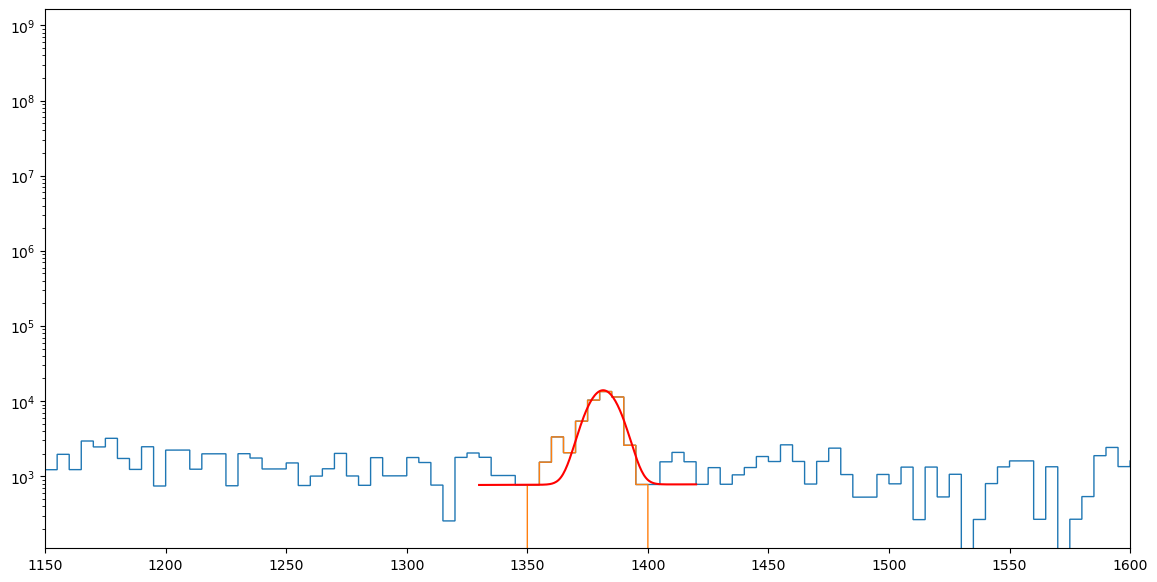

Area under Gaussian: 74641.72 ± 11406.66 counts
Fit parameters: 5546.175151906488 1632.5106673422083 5.36905814994233


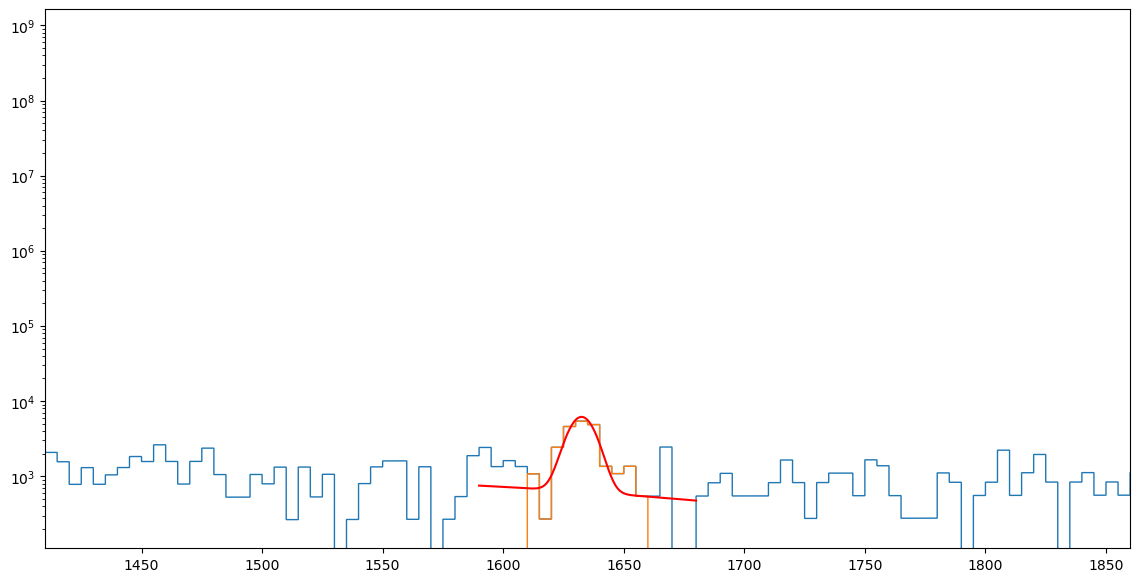

Area under Gaussian: 15638.30 ± 6553.17 counts
Fit parameters: 1742.212084348071 1591.9047477829208 3.5809530780041086


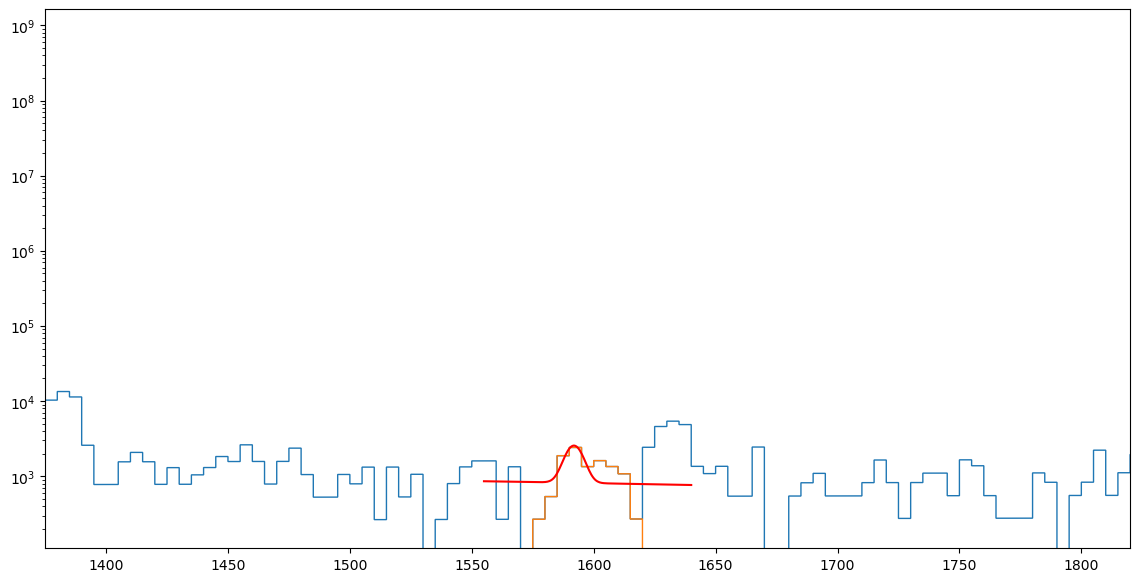

In [307]:
lowlims = [300,1085,1350]
uplims = [350,1130,1400]

areas1 =  []
areas1_err = []

e = Egs1_p
e_eff = Egs1_p_eff


for l,u in zip(lowlims,uplims):
    plt.figure(figsize=(14,7))
    plt.hist(e, bins=np.arange(0,3000+5, 5),weights=1/np.array(e_eff), histtype='step')
    mask = (e < u) & (e>l)
    plt.hist(e[mask], bins=np.arange(0,3000+5,5),weights=1/np.array(e_eff)[mask], histtype='step')
    plt.yscale('log')
    plt.xlim(l-200,u+200)
    
    ys, xs = np.histogram(e[mask], bins=np.arange(l, u+5,5),weights=1/np.array(e_eff)[mask])
    ys_var, _ = np.histogram(e[mask], bins=np.arange(l, u+5,5), weights=1/np.array(e_eff)[mask]**2)
    xs = np.array(xs[:-1])+5/2
    ys_err = np.sqrt(ys_var)
    ys = np.array(ys)   

    
    x_bg = np.concatenate((xs[:1], xs[-1:]))
    y_bg = np.concatenate((ys[:1], ys[-1:]))

    s_fit, c_fit = np.polyfit(x_bg, y_bg, 1)

    func_fixed_bg = lambda x, a, x0, sigma: gausslin(x, a, x0, sigma, s_fit, c_fit)

    a_guess = np.max(ys)
    x0_guess = xs[np.argmax(ys)]
    sigma_guess = 10
    p0_final = [a_guess, x0_guess, sigma_guess]

    #errors = np.sqrt(ys)
    #errors[ys == 0] = np.inf

    popt, pcov = curve_fit(func_fixed_bg,xs,ys,p0=p0_final,sigma=ys_err, absolute_sigma=True)

    final_parameters = [popt[0], popt[1], popt[2], s_fit, c_fit]
    
    xlin = np.linspace(l-20, u+20, 200)
    yfit = gausslin(xlin, *final_parameters)
    area = popt[0] * popt[2] * np.sqrt(2 * np.pi)
    #area_err = np.sqrt(area)
    area_err = np.sqrt(
    (popt[2]**2 * 2 * np.pi * pcov[0, 0]) +
    (popt[0]**2 * 2 * np.pi * pcov[2, 2]) +
    (2 * popt[0] * popt[2] * 2 * np.pi * pcov[0, 2])
)
    print(f"Area under Gaussian: {area:.2f} ± {area_err:.2f} counts")

    plt.plot(xlin, yfit, label="expgauss fit", color='r')
    print("Fit parameters:", *popt)
    areas1.append(area)
    areas1_err.append(area_err)
    plt.show()

#####################################################################################################################################################################################
u = 1660
l = 1610
plt.figure(figsize=(14,7))
plt.hist(e, bins=np.arange(0,3000+5, 5),weights=1/np.array(e_eff), histtype='step')
mask = (e < u) & (e>l)
plt.hist(e[mask], bins=np.arange(0,3000+5,5),weights=1/np.array(e_eff[mask]), histtype='step')
plt.yscale('log')
#plt.ylim(0,25)
plt.xlim(l-200,u+200)

ys, xs = np.histogram(e[mask], bins=np.arange(l, u+5,5),weights=1/np.array(e_eff)[mask])
ys_var, _ = np.histogram(e[mask], bins=np.arange(l, u+5,5), weights=1/np.array(e_eff)[mask]**2)
xs = np.array(xs[:-1])+5/2
ys_err = np.sqrt(ys_var)
ys = np.array(ys)

x_bg = np.concatenate(((xs[:1]+xs[1:2])/2, xs[-1:]))
y_bg = np.concatenate(((ys[:1]+ys[1:2])/2, ys[-1:]))

s_fit, c_fit = np.polyfit(x_bg, y_bg, 1)

func_fixed_bg = lambda x, a, x0, sigma: gausslin(x, a, x0, sigma, s_fit, c_fit)

a_guess = np.max(ys)
x0_guess = xs[np.argmax(ys)]
sigma_guess = 10
p0_final = [a_guess, x0_guess, sigma_guess]


popt, pcov = curve_fit(func_fixed_bg,xs,ys,p0=p0_final,sigma=ys_err,absolute_sigma=True)

final_parameters = [popt[0], popt[1], popt[2], s_fit, c_fit]
xlin = np.linspace(l-20, u+20, 200)
yfit = gausslin(xlin, *final_parameters)
area = popt[0] * popt[2] * np.sqrt(2 * np.pi)
perr = np.sqrt(np.diag(pcov))
area_err = np.sqrt(
    (popt[2]**2 * 2 * np.pi * pcov[0, 0]) +
    (popt[0]**2 * 2 * np.pi * pcov[2, 2]) +
    (2 * popt[0] * popt[2] * 2 * np.pi * pcov[0, 2])
)
print(f"Area under Gaussian: {area:.2f} ± {area_err:.2f} counts")

plt.plot(xlin, yfit, label="expgauss fit", color='r')
print("Fit parameters:", *popt)
areas1.append(area)
areas1_err.append(area_err)
plt.show()
#####################################################################################################################################################################################

u = 1620
l = 1575
bw = 5
plt.figure(figsize=(14,7))
plt.hist(e, bins=np.arange(0,3000+bw, bw),weights=1/np.array(e_eff), histtype='step')
mask = (e < u) & (e>l)
plt.hist(e[mask], bins=np.arange(0,3000+bw,bw),weights=1/np.array(e_eff)[mask], histtype='step')
plt.yscale('log')
#plt.ylim(0,25)
plt.xlim(l-200,u+200)
ys, xs = np.histogram(e[mask], bins=np.arange(l, u+bw,bw),weights=1/np.array(e_eff)[mask])
ys_var, _ = np.histogram(e[mask], bins=np.arange(l, u+bw,bw), weights=1/np.array(e_eff)[mask]**2)
xs = np.array(xs[:-1])+bw/2
ys_err = np.sqrt(ys_var)
ys = np.array(ys)

lowmask = (e<1575) & (e>1500)
upmask = (e<1700) & (e>1650)
ylow, _ = np.histogram(e[lowmask], bins=np.arange(1500, 1575+bw,bw),weights=1/np.array(e_eff)[lowmask])
yup, _ = np.histogram(e[upmask], bins=np.arange(1650, 1700+bw,bw),weights=1/np.array(e_eff)[upmask])
x_bg = np.concatenate((xs[:1], xs[-1:]))
y_bg = [np.mean(ylow), np.mean(yup)]

s_fit, c_fit = np.polyfit(x_bg, y_bg, 1)

func_fixed_bg = lambda x, a, x0, sigma: gausslin(x, a, x0, sigma, s_fit, c_fit)

a_guess = np.max(ys)
x0_guess = xs[np.argmax(ys)]
sigma_guess = 10
p0_final = [a_guess, x0_guess, sigma_guess]

errors = np.sqrt(ys_var)

popt, pcov = curve_fit(func_fixed_bg,xs,ys,p0=p0_final,sigma=errors, absolute_sigma=True)

final_parameters = [popt[0], popt[1], popt[2], s_fit, c_fit]
xlin = np.linspace(l-20, u+20, 200)
yfit = gausslin(xlin, *final_parameters)
area = popt[0] * popt[2] * np.sqrt(2 * np.pi)
perr = np.sqrt(np.diag(pcov))
area_err = np.sqrt(
    (popt[2]**2 * 2 * np.pi * pcov[0, 0]) +
    (popt[0]**2 * 2 * np.pi * pcov[2, 2]) +
    (2 * popt[0] * popt[2] * 2 * np.pi * pcov[0, 2])
)
print(f"Area under Gaussian: {area:.2f} ± {area_err:.2f} counts")

plt.plot(xlin, yfit, label="expgauss fit", color='r')
print("Fit parameters:", *popt)
areas1.append(area)
areas1_err.append(area_err)
plt.show()


In [308]:
for a,e in zip(areas1,areas1_err):
    print(f"area: {a:.0f} +/- {e:.0f} - ({e/a*100})")
#areas, areas_err
totc = areas1[0]
totc_e = areas1_err[0]
def rel(c, c_e):
    br = (c/totc) *100
    br_e = br*np.sqrt((c_e/c)**2+(totc_e/totc)**2)
    return br,br_e
for i in range(0,5):
    print(rel(areas1[i], areas1_err[i]))

area: 1715808 +/- 44000 - (2.564412254195835)
area: 85852 +/- 13488 - (15.711309404372823)
area: 199224 +/- 17115 - (8.590657251476475)
area: 74642 +/- 11407 - (15.2818839172973)
area: 15638 +/- 6553 - (41.90458474968433)
(100.0, 3.6266265893995113)
(5.0035784016017, 0.7965304776111218)
(11.611089078372833, 1.0409624814536063)
(4.3502366142514814, 0.6740932531673651)
(0.9114248031353056, 0.382643273664674)


In [285]:

def G1eff(E):
    A = -1.23
    B = 6.4e-2
    C = 1.2e7
    ln_e_value = A * np.log(E) + B * np.log(E)**2 - C / E**3
    return np.exp(ln_e_value)

def G2eff(E):
    A = 0.138 
    B = -0.5
    return A * E**(B)

G1eff(300), G2eff(300)

(0.004617156317415064, 0.007967433714816835)

Area under Gaussian: 915323.49 ± 26421.54 counts
Fit parameters: 152421.21617309412 331.44723587851104 2.395737609764855


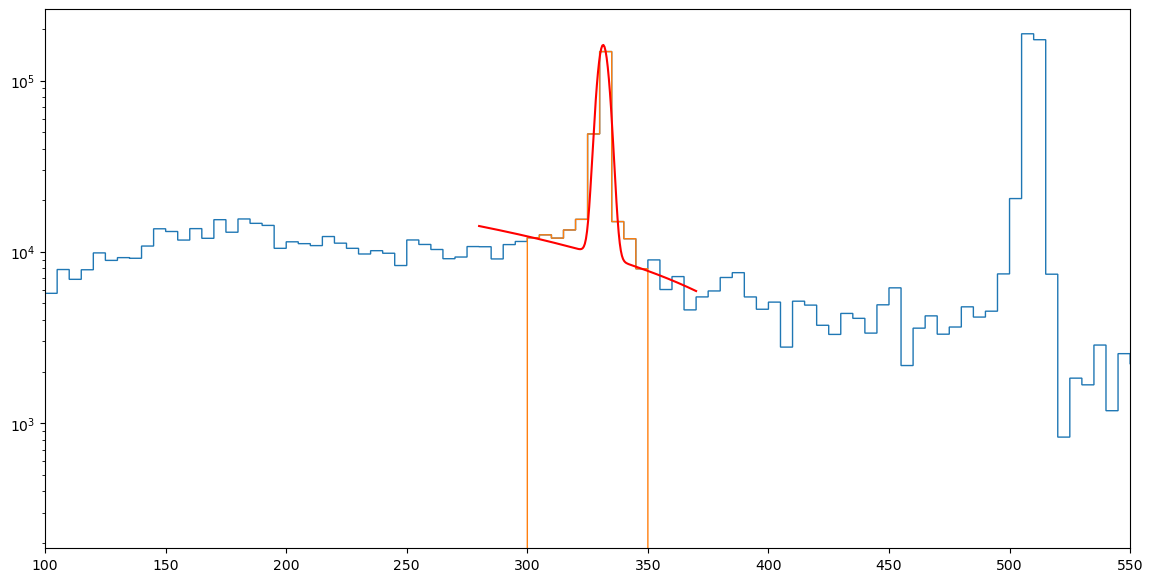

Area under Gaussian: 55370.12 ± 11071.08 counts
Fit parameters: 2900.2184202679064 1105.7310167865476 7.6164892165823534


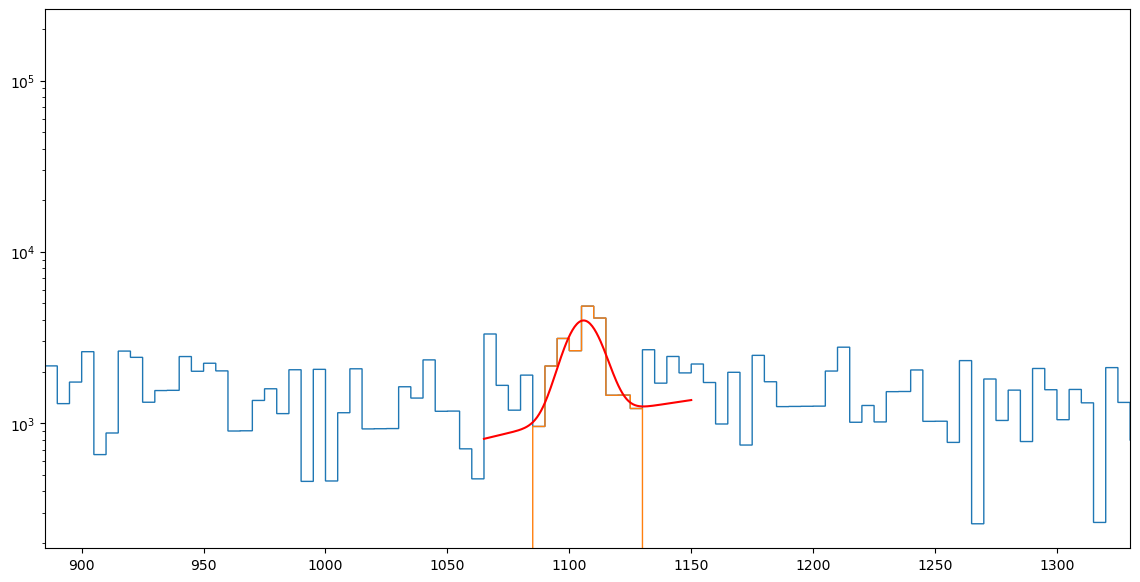

Area under Gaussian: 145199.34 ± 15194.71 counts
Fit parameters: 10123.26733581425 1381.906216116592 5.72208084893109


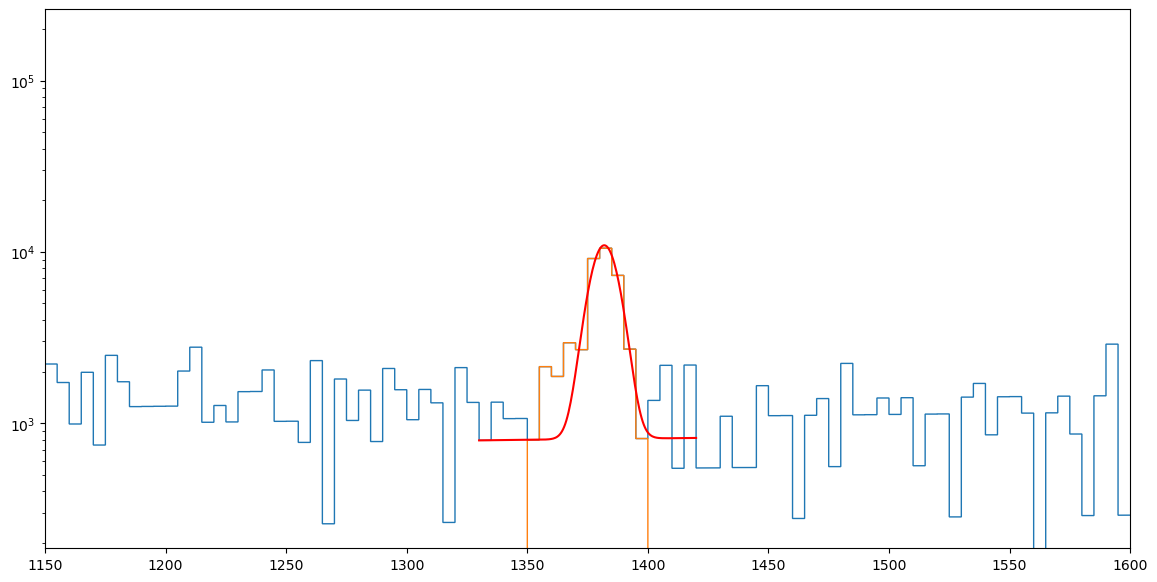

Area under Gaussian: 79770.92 ± 12504.23 counts
Fit parameters: 5619.351260819272 1630.980943808571 5.663285723288803


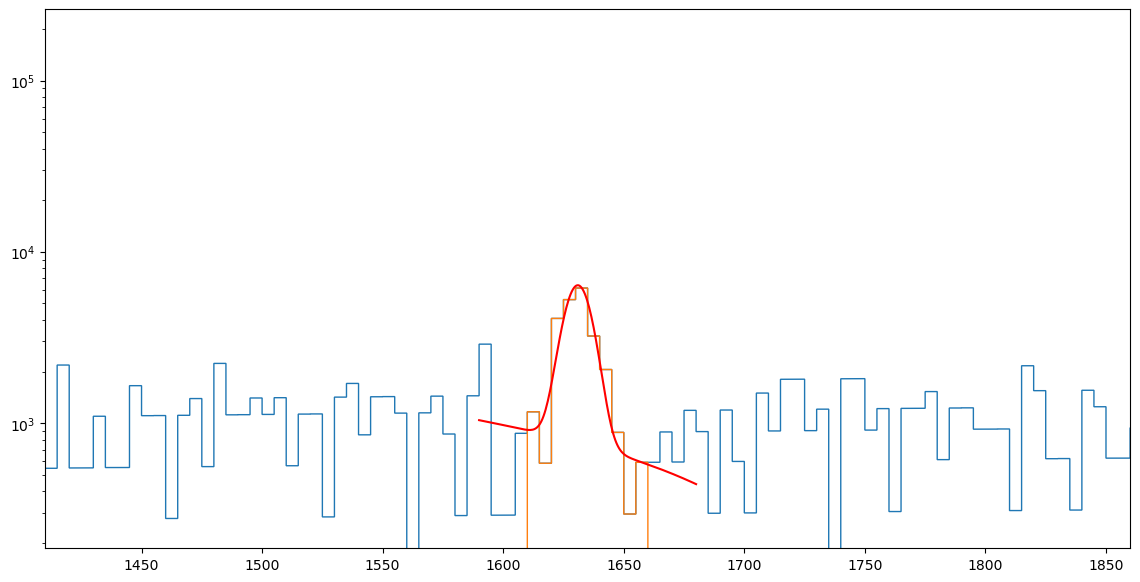

Area under Gaussian: 2503.38 ± 891616.69 counts
Fit parameters: 882.531423399646 1592.4982366720521 1.1316343999751401


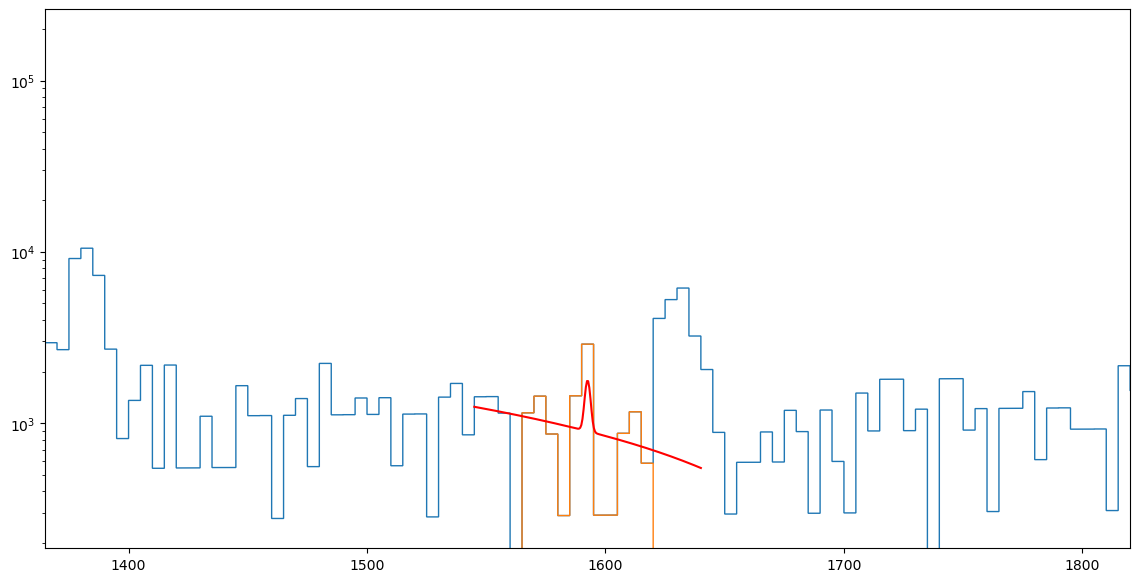

In [309]:
lowlims = [300,1085,1350]
uplims = [350,1130,1400]

areas2 =  []
areas2_err = []

e = Egs2_p
e_eff = Egs2_p_eff
bw = 5

for l,u in zip(lowlims,uplims):
    plt.figure(figsize=(14,7))
    plt.hist(e, bins=np.arange(0,3000+bw, bw),weights=1/np.array(e_eff), histtype='step')
    mask = (e < u) & (e>l)
    plt.hist(e[mask], bins=np.arange(0,3000+bw,bw),weights=1/np.array(e_eff)[mask], histtype='step')
    plt.yscale('log')
    plt.xlim(l-200,u+200)
    
    ys, xs = np.histogram(e[mask], bins=np.arange(l, u+bw,bw),weights=1/np.array(e_eff)[mask])
    ys_var, _ = np.histogram(e[mask], bins=np.arange(l, u+bw,bw), weights=1/np.array(e_eff)[mask]**2)
    xs = np.array(xs[:-1])+bw/2
    ys_err = np.sqrt(ys_var)
    ys = np.array(ys)   

    
    x_bg = np.concatenate((xs[:1], xs[-1:]))
    y_bg = np.concatenate((ys[:1], ys[-1:]))

    s_fit, c_fit = np.polyfit(x_bg, y_bg, 1)

    func_fixed_bg = lambda x, a, x0, sigma: gausslin(x, a, x0, sigma, s_fit, c_fit)

    a_guess = np.max(ys)
    x0_guess = xs[np.argmax(ys)]
    sigma_guess = 10
    p0_final = [a_guess, x0_guess, sigma_guess]

    #errors = np.sqrt(ys)
    #errors[ys == 0] = np.inf

    popt, pcov = curve_fit(func_fixed_bg,xs,ys,p0=p0_final,sigma=ys_err, absolute_sigma=True)

    final_parameters = [popt[0], popt[1], popt[2], s_fit, c_fit]
    
    xlin = np.linspace(l-20, u+20, 200)
    yfit = gausslin(xlin, *final_parameters)
    area = popt[0] * popt[2] * np.sqrt(2 * np.pi)
    #area_err = np.sqrt(area)
    area_err = np.sqrt(
    (popt[2]**2 * 2 * np.pi * pcov[0, 0]) +
    (popt[0]**2 * 2 * np.pi * pcov[2, 2]) +
    (2 * popt[0] * popt[2] * 2 * np.pi * pcov[0, 2])
)
    print(f"Area under Gaussian: {area:.2f} ± {area_err:.2f} counts")

    plt.plot(xlin, yfit, label="expgauss fit", color='r')
    print("Fit parameters:", *popt)
    areas2.append(area)
    areas2_err.append(area_err)
    plt.show()

#####################################################################################################################################################################################
u = 1660
l = 1610
plt.figure(figsize=(14,7))
plt.hist(e, bins=np.arange(0,3000+bw, bw),weights=1/np.array(e_eff), histtype='step')
mask = (e < u) & (e>l)
plt.hist(e[mask], bins=np.arange(0,3000+bw,bw),weights=1/np.array(e_eff[mask]), histtype='step')
plt.yscale('log')
#plt.ylim(0,2bw)
plt.xlim(l-200,u+200)

ys, xs = np.histogram(e[mask], bins=np.arange(l, u+bw,bw),weights=1/np.array(e_eff)[mask])
ys_var, _ = np.histogram(e[mask], bins=np.arange(l, u+bw,bw), weights=1/np.array(e_eff)[mask]**2)
xs = np.array(xs[:-1])+bw/2
ys_err = np.sqrt(ys_var)
ys = np.array(ys)

x_bg = np.concatenate(((xs[:1]+xs[1:2])/2, xs[-1:]))
y_bg = np.concatenate(((ys[:1]+ys[1:2])/2, ys[-1:]))

s_fit, c_fit = np.polyfit(x_bg, y_bg, 1)

func_fixed_bg = lambda x, a, x0, sigma: gausslin(x, a, x0, sigma, s_fit, c_fit)

a_guess = np.max(ys)
x0_guess = xs[np.argmax(ys)]
sigma_guess = 10
p0_final = [a_guess, x0_guess, sigma_guess]


popt, pcov = curve_fit(func_fixed_bg,xs,ys,p0=p0_final,sigma=ys_err,absolute_sigma=True)

final_parameters = [popt[0], popt[1], popt[2], s_fit, c_fit]
xlin = np.linspace(l-20, u+20, 200)
yfit = gausslin(xlin, *final_parameters)
area = popt[0] * popt[2] * np.sqrt(2 * np.pi)
perr = np.sqrt(np.diag(pcov))
area_err = np.sqrt(
    (popt[2]**2 * 2 * np.pi * pcov[0, 0]) +
    (popt[0]**2 * 2 * np.pi * pcov[2, 2]) +
    (2 * popt[0] * popt[2] * 2 * np.pi * pcov[0, 2])
)
print(f"Area under Gaussian: {area:.2f} ± {area_err:.2f} counts")

plt.plot(xlin, yfit, label="expgauss fit", color='r')
print("Fit parameters:", *popt)
areas2.append(area)
areas2_err.append(area_err)
plt.show()
#####################################################################################################################################################################################

u = 1620
l = 1565


plt.figure(figsize=(14,7))
plt.hist(e, bins=np.arange(0,3000+bw, bw),weights=1/np.array(e_eff), histtype='step')
mask = (e < u) & (e>l)
plt.hist(e[mask], bins=np.arange(0,3000+bw,bw),weights=1/np.array(e_eff)[mask], histtype='step')
plt.yscale('log')
#plt.ylim(0,25)
plt.xlim(l-200,u+200)
ys, xs = np.histogram(e[mask], bins=np.arange(l, u+bw,bw),weights=1/np.array(e_eff)[mask])
ys_var, _ = np.histogram(e[mask], bins=np.arange(l, u+bw,bw), weights=1/np.array(e_eff)[mask]**2)
xs = np.array(xs[:-1])+bw/2
ys_err = np.sqrt(ys_var)
ys = np.array(ys)

lowmask = (e<1575) & (e>1500)
upmask = (e<1700) & (e>1650)
ylow, _ = np.histogram(e[lowmask], bins=np.arange(1500, 1575+bw,bw),weights=1/np.array(e_eff)[lowmask])
yup, _ = np.histogram(e[upmask], bins=np.arange(1650, 1700+bw,bw),weights=1/np.array(e_eff)[upmask])
x_bg = np.concatenate((xs[:1], xs[-1:]))
y_bg = [np.mean(ylow), np.mean(yup)]

s_fit, c_fit = np.polyfit(x_bg, y_bg, 1)

func_fixed_bg = lambda x, a, x0, sigma: gausslin(x, a, x0, sigma, s_fit, c_fit)

a_guess = np.max(ys)
x0_guess = xs[np.argmax(ys)]
sigma_guess = 10
p0_final = [a_guess, x0_guess, sigma_guess]
lbounds = [0, 0, 0]
ubounds = [np.inf,np.inf,np.inf]
bounds = (lbounds,ubounds)
errors = np.sqrt(ys_var)

popt, pcov = curve_fit(func_fixed_bg,xs,ys,p0=p0_final,sigma=errors, bounds=bounds, absolute_sigma=True)

final_parameters = [popt[0], popt[1], popt[2], s_fit, c_fit]
xlin = np.linspace(l-20, u+20, 200)
yfit = gausslin(xlin, *final_parameters)
area = popt[0] * abs(popt[2]) * np.sqrt(2 * np.pi)
perr = np.sqrt(np.diag(pcov))
area_err = np.sqrt(
    (popt[2]**2 * 2 * np.pi * pcov[0, 0]) +
    (popt[0]**2 * 2 * np.pi * abs(pcov[2, 2])) +
    (2 * popt[0] * abs(popt[2]) * 2 * np.pi * pcov[0, 2])
)
print(f"Area under Gaussian: {area:.2f} ± {area_err:.2f} counts")

plt.plot(xlin, yfit, label="expgauss fit", color='r')
print("Fit parameters:", *popt)
areas2.append(area)
areas2_err.append(area_err)
plt.show()


In [311]:
print("Eg1 BR")
print("="*60)
for a,e in zip(areas1,areas1_err):
    print(f"area: {a:.0f} +/- {e:.0f} - ({e/a*100})")
#areas, areas_err
totc = areas1[0]
totc_e = areas1_err[0]
def rel(c, c_e):
    br = (c/totc) *100
    br_e = br*np.sqrt((c_e/c)**2+(totc_e/totc)**2)
    return br,br_e
for i in range(0,5):
    print(rel(areas1[i], areas1_err[i]))
print()
print("Eg2 BR")
print("="*60)
for a,e in zip(areas2,areas2_err):
    print(f"area: {a:.0f} +/- {e:.0f} - ({e/a*100})")
#areas, areas_err
totc = areas2[0]
totc_e = areas2_err[0]
def rel(c, c_e):
    br = (c/totc) *100
    br_e = br*np.sqrt((c_e/c)**2+(totc_e/totc)**2)
    return br,br_e
for i in range(0,5):
    print(rel(areas2[i], areas2_err[i]))
    

Eg1 BR
area: 1715808 +/- 44000 - (2.564412254195835)
area: 85852 +/- 13488 - (15.711309404372823)
area: 199224 +/- 17115 - (8.590657251476475)
area: 74642 +/- 11407 - (15.2818839172973)
area: 15638 +/- 6553 - (41.90458474968433)
(100.0, 3.6266265893995113)
(5.0035784016017, 0.7965304776111218)
(11.611089078372833, 1.0409624814536063)
(4.3502366142514814, 0.6740932531673651)
(0.9114248031353056, 0.382643273664674)

Eg2 BR
area: 915323 +/- 26422 - (2.886579103356217)
area: 55370 +/- 11071 - (19.994681176424326)
area: 145199 +/- 15195 - (10.464722352236675)
area: 79771 +/- 12504 - (15.675176641077268)
area: 2503 +/- 891617 - (35616.55709746167)
(100.0, 4.08223931682913)
(6.049240690750758, 1.222065823089209)
(15.86317160416825, 1.7220329689914289)
(8.715051947951416, 1.3890696591102887)
(0.27349641968348043, 97.41000879599672)


In [ ]:
area: 1715808 +/- 44000 - (2.564412254195835)
area: 85852 +/- 13488 - (15.711309404372823)
area: 199224 +/- 17115 - (8.590657251476475)
area: 74642 +/- 11407 - (15.2818839172973)
area: 15638 +/- 6553 - (41.90458474968433)
(100.0, 3.6266265893995113)
(5.0035784016017, 0.7965304776111218)
(11.611089078372833, 1.0409624814536063)
(4.3502366142514814, 0.6740932531673651)
(0.9114248031353056, 0.382643273664674)